In [118]:
from urllib.request import urlopen
import json
import pandas as pd
import matplotlib.pyplot as plt

def distancia(dataframe):
    dataframe['dist_per'] = ((dataframe['x']- dataframe['x'].shift(-1))**2 +
                            (dataframe['y']- dataframe['y'].shift(-1))**2 +
                            (dataframe['z']- dataframe['z'].shift(-1))**2)**(1/2)
    x= dataframe.columns.get_loc('x')
    y= dataframe.columns.get_loc('y')
    z =dataframe.columns.get_loc('z')

    dataframe.iat[len(dataframe)-1,dataframe.columns.get_loc('dist_per')] = ((dataframe.iat[0,x]- dataframe.iat[len(dataframe)-1,x])**2 
                                                 + (dataframe.iat[0,y]- dataframe.iat[len(dataframe) -1,y])**2
                                                 + (dataframe.iat[0,z]- dataframe.iat[len(dataframe)-1,y])**2)**(1/2)









In [119]:
retorno1 = urlopen("https://api.openf1.org/v1/sessions?date_start%3E%3D2025-03-01&date_end%3C%3D2025-04-30&session_type=Qualifying")
sessoes = pd.DataFrame(json.loads(retorno1.read().decode('utf-8')))
sessoes

,meeting_key,session_key,location,date_start,date_end,session_type,session_name,country_key,country_code,country_name,circuit_key,circuit_short_name,gmt_offset,year
0,1254,9689,Melbourne,2025-03-15T05:00:00+00:00,2025-03-15T06:00:00+00:00,Qualifying,Qualifying,5,AUS,Australia,10,Melbourne,11:00:00,2025
1,1255,9989,Shanghai,2025-03-21T07:30:00+00:00,2025-03-21T08:14:00+00:00,Qualifying,Sprint Qualifying,53,CHN,China,49,Shanghai,08:00:00,2025
2,1255,9994,Shanghai,2025-03-22T07:00:00+00:00,2025-03-22T08:00:00+00:00,Qualifying,Qualifying,53,CHN,China,49,Shanghai,08:00:00,2025
3,1256,10002,Suzuka,2025-04-05T06:00:00+00:00,2025-04-05T07:00:00+00:00,Qualifying,Qualifying,4,JPN,Japan,46,Suzuka,09:00:00,2025
4,1257,10010,Sakhir,2025-04-12T16:00:00+00:00,2025-04-12T17:00:00+00:00,Qualifying,Qualifying,36,BRN,Bahrain,63,Sakhir,03:00:00,2025
5,1258,10018,Jeddah,2025-04-19T17:00:00+00:00,2025-04-19T18:00:00+00:00,Qualifying,Qualifying,153,KSA,Saudi Arabia,149,Jeddah,03:00:00,2025


In [120]:
retorno2 = urlopen("https://api.openf1.org/v1/laps?driver_number=1&session_key=9689")
inicio = pd.DataFrame(json.loads(retorno2.read().decode('utf-8')))
inicio

,meeting_key,session_key,driver_number,lap_number,date_start,duration_sector_1,duration_sector_2,duration_sector_3,i1_speed,i2_speed,is_pit_out_lap,lap_duration,segments_sector_1,segments_sector_2,segments_sector_3,st_speed
0,1254,9689,1,1,2025-03-15T05:04:18.324000+00:00,40.011,21.330,37.466,269,267,True,98.807,"[2064, 2049, 2049, 2049, 2049, 2049, 2049, 204...","[2049, 2049, 2049, 2049, 2049]","[2049, 2049, 2049, 2049, 2049, 2049, 2049]",182
1,1254,9689,1,2,2025-03-15T05:05:55.056000+00:00,26.366,17.171,32.481,291,327,False,76.018,"[2049, 2049, 2049, 2049, 2049, 2051, 2049, 204...","[2049, 2049, 2051, 2049, 2049]","[2049, 2049, 2051, 2049, 2049, 2049, 2048, 0]",328
2,1254,9689,1,3,2025-03-15T05:07:11.022000+00:00,37.899,23.269,NaN,171,264,False,NaN,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0, 0, 0, 0]",251
3,1254,9689,1,4,2025-03-15T05:13:21.859000+00:00,43.250,22.744,NaN,192,259,True,NaN,"[2064, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0, 0, 0, 0]",167
4,1254,9689,1,5,2025-03-15T05:15:05.352000+00:00,26.464,17.743,39.339,290,298,False,83.546,"[2048, 2049, 2049, 2049, 2049, 2048, 2048, 204...","[2049, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0, 0, 0, 0]",326
5,1254,9689,1,6,2025-03-15T05:25:04.485000+00:00,42.104,21.060,37.358,254,283,True,100.522,"[2064, 2048, 2050, 2050, 2048, 2048, 2050, 204...","[2048, 2048, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2050, 2050, 2050]",165
6,1254,9689,1,7,2025-03-15T05:26:40.499000+00:00,26.229,17.038,32.421,290,329,False,75.688,"[2050, 2050, 2048, 2050, 2050, 2048, 2048, 205...","[2048, 2048, 2050, 2050, 2050]","[2050, 2050, 2050, 2048, 2050, 2050, 2048, 2048]",325
7,1254,9689,1,8,2025-03-15T05:27:56.287000+00:00,36.554,24.574,NaN,194,189,False,NaN,"[2048, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0, 0, 0, 0]",258
8,1254,9689,1,9,2025-03-15T05:37:32.102000+00:00,67.468,25.723,NaN,250,190,True,NaN,"[2064, 2048, 2048, 2048, 2048, 2048, 2048, 204...","[2048, 2048, 2048, 2048, 2048]","[0, 0, 0, 0, 0, 0, 0, 0]",118
9,1254,9689,1,10,2025-03-15T05:39:33.715000+00:00,26.090,17.003,32.472,289,328,False,85.602,"[2048, 2050, 2048, 2048, 2050, 2048, 2048, 204...","[2048, 2050, 2048, 2048, 2048]","[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]",330


In [121]:
linha = list(inicio[inicio['st_speed'] == inicio['st_speed'].max()].index)
inicio_volta = inicio.iloc[linha[0], 4]
final_volta = inicio.iloc[linha[0]+1,4]

retorno3 =  urlopen(f"https://api.openf1.org/v1/location?driver_number=1&session_key=9689&date>={inicio_volta}&date<={final_volta}")
voltas_base = pd.DataFrame(json.loads(retorno3.read().decode('utf-8')))
voltas_base



,date,session_key,meeting_key,driver_number,z,x,y
0,2025-03-15T05:50:39.768000+00:00,9689,1254,1,84,-1301,-1233
1,2025-03-15T05:50:39.968000+00:00,9689,1254,1,83,-1430,-1110
2,2025-03-15T05:50:40.169000+00:00,9689,1254,1,82,-1559,-988
3,2025-03-15T05:50:40.367000+00:00,9689,1254,1,81,-1689,-864
4,2025-03-15T05:50:40.547000+00:00,9689,1254,1,79,-1885,-678
...,...,...,...,...,...,...,...
289,2025-03-15T05:51:54.287000+00:00,9689,1254,1,88,-659,-1844
290,2025-03-15T05:51:54.687000+00:00,9689,1254,1,87,-815,-1696
291,2025-03-15T05:51:54.907000+00:00,9689,1254,1,86,-945,-1572
292,2025-03-15T05:51:55.128000+00:00,9689,1254,1,85,-1145,-1381


In [122]:
retorno4 =  urlopen(f"https://api.openf1.org/v1/car_data?driver_number=1&session_key=9689&date>={inicio_volta}&date<={final_volta}")
carro = pd.DataFrame(json.loads(retorno4.read().decode('utf-8')))
carro

,date,session_key,meeting_key,driver_number,rpm,speed,brake,throttle,drs,n_gear
0,2025-03-15T05:50:39.881000+00:00,9689,1254,1,11316,319,0,100,12,8
1,2025-03-15T05:50:40.041000+00:00,9689,1254,1,11380,321,0,100,12,8
2,2025-03-15T05:50:40.321000+00:00,9689,1254,1,11399,323,0,100,12,8
3,2025-03-15T05:50:40.481000+00:00,9689,1254,1,11452,323,0,100,12,8
4,2025-03-15T05:50:40.841000+00:00,9689,1254,1,11564,326,0,100,12,8
...,...,...,...,...,...,...,...,...,...,...
285,2025-03-15T05:51:54.201000+00:00,9689,1254,1,10735,299,0,100,12,8
286,2025-03-15T05:51:54.521000+00:00,9689,1254,1,10759,304,0,100,12,8
287,2025-03-15T05:51:54.882000+00:00,9689,1254,1,11027,307,0,100,12,8
288,2025-03-15T05:51:55.042000+00:00,9689,1254,1,11058,310,0,100,12,8


In [123]:
voltas_base['date']= pd.to_datetime(voltas_base['date'])
voltas_base.set_index('date', inplace=True)
carro['date']= pd.to_datetime(carro['date'])
carro.set_index('date', inplace=True)

voltas_completa = voltas_base.join(carro, how='outer', lsuffix='_base',rsuffix='_carro')
voltas_completa

,session_key_base,meeting_key_base,driver_number_base,z,x,y,session_key_carro,meeting_key_carro,driver_number_carro,rpm,speed,brake,throttle,drs,n_gear
date,,,,,,,,,,,,,,,
2025-03-15 05:50:39.768000+00:00,9689.0,1254.0,1.0,84.0,-1301.0,-1233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-15 05:50:39.881000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,9689.0,1254.0,1.0,11316.0,319.0,0.0,100.0,12.0,8.0
2025-03-15 05:50:39.968000+00:00,9689.0,1254.0,1.0,83.0,-1430.0,-1110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-15 05:50:40.041000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,9689.0,1254.0,1.0,11380.0,321.0,0.0,100.0,12.0,8.0
2025-03-15 05:50:40.169000+00:00,9689.0,1254.0,1.0,82.0,-1559.0,-988.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-15 05:51:54.907000+00:00,9689.0,1254.0,1.0,86.0,-945.0,-1572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-15 05:51:55.042000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,9689.0,1254.0,1.0,11058.0,310.0,0.0,100.0,12.0,8.0
2025-03-15 05:51:55.128000+00:00,9689.0,1254.0,1.0,85.0,-1145.0,-1381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
novo_tempo = pd.date_range(start=min(voltas_base.index.min(),carro.index.min()),end=max(voltas_base.index.max(),carro.index.max()),freq=pd.to_timedelta(1 / 3.7, unit='s'))
novo_index = novo_tempo.union(voltas_completa.index)
voltas_reindex = voltas_completa.reindex(novo_index)
voltas_reindex

,session_key_base,meeting_key_base,driver_number_base,z,x,y,session_key_carro,meeting_key_carro,driver_number_carro,rpm,speed,brake,throttle,drs,n_gear
2025-03-15 05:50:39.768000+00:00,9689.0,1254.0,1.0,84.0,-1301.0,-1233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-15 05:50:39.881000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,9689.0,1254.0,1.0,11316.0,319.0,0.0,100.0,12.0,8.0
2025-03-15 05:50:39.968000+00:00,9689.0,1254.0,1.0,83.0,-1430.0,-1110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-15 05:50:40.038270270+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-15 05:50:40.041000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,9689.0,1254.0,1.0,11380.0,321.0,0.0,100.0,12.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-15 05:51:55.042000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,9689.0,1254.0,1.0,11058.0,310.0,0.0,100.0,12.0,8.0
2025-03-15 05:51:55.128000+00:00,9689.0,1254.0,1.0,85.0,-1145.0,-1381.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-15 05:51:55.173405330+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-03-15 05:51:55.321000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,9689.0,1254.0,1.0,11102.0,313.0,0.0,100.0,12.0,8.0


In [125]:
voltas_final = voltas_reindex.interpolate(method='time')
distancia(voltas_final)
voltas_final

,session_key_base,meeting_key_base,driver_number_base,z,x,y,session_key_carro,meeting_key_carro,driver_number_carro,rpm,speed,brake,throttle,drs,n_gear,dist_per
2025-03-15 05:50:39.768000+00:00,9689.0,1254.0,1.0,84.000000,-1301.000000,-1233.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.707924
2025-03-15 05:50:39.881000+00:00,9689.0,1254.0,1.0,83.435000,-1373.884959,-1163.505039,9689.0,1254.0,1.0,11316.000000,319.000000,0.0,100.0,12.0,8.0,77.536290
2025-03-15 05:50:39.968000+00:00,9689.0,1254.0,1.0,83.000000,-1430.000000,-1110.000000,9689.0,1254.0,1.0,11350.800026,320.087501,0.0,100.0,12.0,8.0,62.074003
2025-03-15 05:50:40.038270270+00:00,9689.0,1254.0,1.0,82.650397,-1475.098805,-1067.348417,9689.0,1254.0,1.0,11378.908109,320.965878,0.0,100.0,12.0,8.0,2.411337
2025-03-15 05:50:40.041000+00:00,9689.0,1254.0,1.0,82.636816,-1476.850720,-1065.691567,9689.0,1254.0,1.0,11380.000000,321.000000,0.0,100.0,12.0,8.0,113.070285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-15 05:51:55.042000+00:00,9689.0,1254.0,1.0,85.389141,-1067.171807,-1455.325924,9689.0,1254.0,1.0,11058.000000,310.000000,0.0,100.0,12.0,8.0,107.618409
2025-03-15 05:51:55.128000+00:00,9689.0,1254.0,1.0,85.000000,-1145.000000,-1381.000000,9689.0,1254.0,1.0,11071.562741,310.924732,0.0,100.0,12.0,8.0,29.109962
2025-03-15 05:51:55.173405330+00:00,9689.0,1254.0,1.0,84.848142,-1166.108210,-1360.954793,9689.0,1254.0,1.0,11078.723454,311.412963,0.0,100.0,12.0,8.0,94.624569
2025-03-15 05:51:55.321000+00:00,9689.0,1254.0,1.0,84.354515,-1234.722359,-1295.796033,9689.0,1254.0,1.0,11102.000000,313.000000,0.0,100.0,12.0,8.0,67.957930


<Axes: xlabel='x', ylabel='y'>

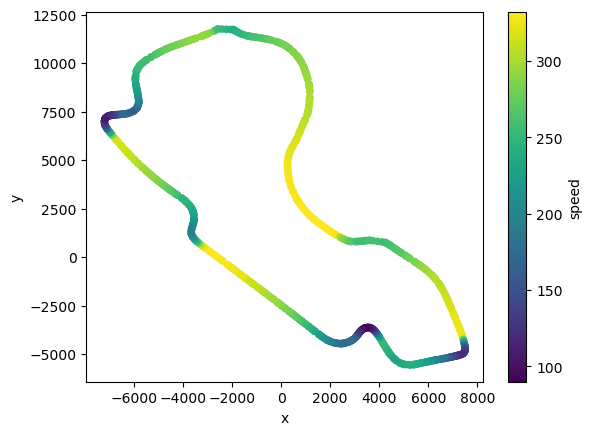

In [126]:
voltas_final.plot.scatter(x='x',y='y',c='speed')

<Axes: xlabel='x', ylabel='y'>

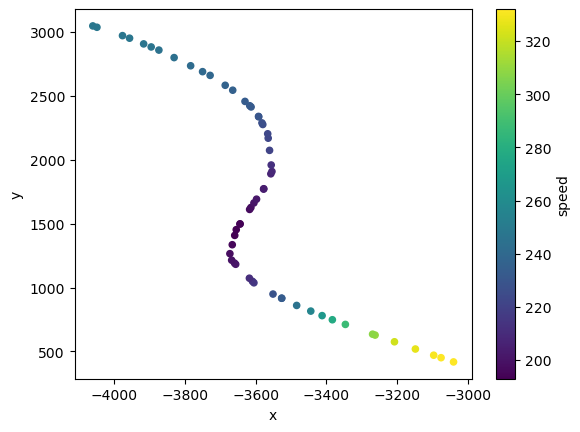

In [130]:
curva01x = (voltas_final['x']<=-3000) & (voltas_final['x']>=-4100)
curva01y = (voltas_final['y']>=-1100) & (voltas_final['y']<=4900)
curva01 = voltas_final[curva01x & curva01y].copy()
curva01.plot.scatter(x='x',y='y',c='speed')

In [148]:
distancia_volta = voltas_final['dist_per'].sum() 
distancia_real = 5.278 # km
escala = distancia_volta/distancia_real # unidades arbitrárias por km


In [147]:
distancia(curva01)
distancia_curva = curva01['dist_per'].sum()- curva01.iat[len(curva01)-1, curva01.columns.get_loc('dist_per')]

temp_inicio = pd.to_datetime(curva01.index.min())
temp_final = pd.to_datetime(curva01.index.max())

intervalo = (temp_final-temp_inicio).total_seconds()
print(intervalo)
velocidade = distancia_curva/((intervalo/3600)*escala)
print(velocidade)





4.693
228.6759734685871
